## Finding Pairwise Correlations for DepMap (20Q2) Gene-Dependencies and Gene-Effects

In [158]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr

In [3]:
dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

In [159]:
effect = pd.read_csv("/home/annerer/Downloads/Achilles_gene_effect.csv")

In [99]:
#effect.head()

In [160]:
effect = effect.drop("DepMap_ID",1)

In [153]:
# zerlegen bringt hier insofern nichts da wir 
# trotzdem alle Paarweisen Korrelationen brauchen
df = effect.iloc[:, : 9000]
df2 = effect.iloc[:,9001:effect.shape[1]]

## New Vectorized Correlation Functions

In [154]:
def corr2_coeff(A, B):
    # Rowwise mean of input arrays & subtract from input arrays themeselves
    A_mA = A - A.mean()
    B_mB = B - B.mean()

    # Sum of squares across rows
    ssA = (A_mA**2).sum()
    ssB = (B_mB**2).sum()

    # Finally get corr coeff
    return np.dot(A_mA, B_mB.T) / np.sqrt(np.dot(ssA,ssB))

going with this one

In [173]:
def vcorrcoef(X,y):
    Xm = X.mean()
    ym = y.mean()
    r_num = np.sum((X-Xm)*(y-ym))
    r_den = np.sqrt(np.sum((X-Xm)**2)*np.sum((y-ym)**2))
    r = r_num/r_den
    return r

test case works

In [174]:
vcorrcoef(df['TP53 (7157)'],df["MDM2 (4193)"])

-0.6967472861744265

In [ ]:
correlations = {}
for col_a, col_b in itertools.combinations(effect, 2):
    correlations[col_a + '__' + col_b] = vcorrcoef(effect[col_a],effect[col_b])

In [ ]:
result = pd.DataFrame.from_dict(correlations, orient='index')
pd.write_csv("effect_corr_pairs.csv",result)

potentially better version:

In [ ]:
# should not be needed, as the above version handles NaNs

correlations = {}
for col_a, col_b in itertools.combinations(effect, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    correlations[col_a + '__' + col_b] = vcorrcoef(effect[col_a][~nas],effect[col_b][~nas])

In [ ]:
#correlations = {}
#for col_a, col_b in itertools.combinations(df, 2):
#    correlations[col_a + '__' + col_b] = df.corr(col_a,col_b)

In [157]:
#for col_a, col_b in itertools.combinations(df, 2):
#    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
 #   corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
#    correlations[col_a + '__' + col_b] = corr

#result = pd.DataFrame.from_dict(correlations, orient='index')
#result.columns = ['PCC', 'p-value']
#result

Im web-interface von DepMap wird von Co-Dependencies gesprochen wenn
Korrelationen von Gene-Effect-Werten gemeint sind.

In [30]:
print(pearsonr(effect['TP53 (7157)'],effect['MDM2 (4193)']))
print(pearsonr(effect['TP53 (7157)'],effect['CDKN1A (1026)']))

(-0.6967472861744267, 8.831043835754099e-113)
(0.7046256686090427, 2.1308475953700828e-116)


In [33]:
effect['RAN (5901)'].isnull().sum()

12

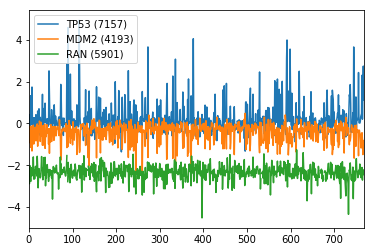

In [94]:
effect["TP53 (7157)"].plot()
effect["MDM2 (4193)"].plot()
effect["RAN (5901)"].plot()
plt.legend()
plt.savefig('comparrison_of_gene_effect_TP53_MDM2_RAN')

Korrelationsskript

In [89]:
correlations = {}
df = effect[['MDM2 (4193)','TP53 (7157)']]

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
result

In [75]:
df = pd.DataFrame(np.random.random((6, 6)), columns=[chr(i + ord('a')) for i in range(6)]) 
df['a'][3] = np.nan
df['b'][4] = np.nan
print(df)

          a         b         c         d         e         f
0  0.238729  0.836833  0.844553  0.673913  0.478680  0.622733
1  0.442589  0.560388  0.344260  0.724260  0.231331  0.568334
2  0.851465  0.515215  0.464266  0.561362  0.071919  0.180770
3       NaN  0.812376  0.695367  0.309487  0.826105  0.817678
4  0.846068       NaN  0.156010  0.346022  0.740878  0.211795
5  0.679405  0.830221  0.057410  0.083349  0.570318  0.862084


In [78]:
nas = np.logical_or(np.isnan(df['a']), np.isnan(df['b']))
df['a'][~nas]

0    0.238729
1    0.442589
2    0.851465
5    0.679405
Name: a, dtype: float64

In [ ]:
correlations = {}

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr

    
result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
result.to_csv('effect_pairs.csv')

In [73]:
myarray = np.array([1,2,3,4,5,6,7,8,9,10])
zipped_array = zip(myarray[::2], myarray[1::2])
list(zipped_array)

[(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

### Get the shoulder from the sorted PCC DataFrame

In [ ]:
result

### Pandas stellt die Importierten Daten nicht in ihrer vollen Laenge dar. Bei Berechnungen werden die 50+ Nachkommastellen jedoch verwendet

In [ ]:
#with pd.option_context('display.precision', 50):
#    print(dep['TP53 (7157)'].sort_values())

## Wichtiges Snippet. Berechnung der Korrelation wobei ich keinen Wert nehmen wenn einer der Partner NaN ist.

In [ ]:
#dep_corr = dep.corr()

for i in range(len(effect.columns)):    
    x, y = effect.iloc[ :,i].values,
    nas = np.logical_or(np.isnan(x), np.isnan(y))
    corr = pearsonr(x[~nas], y[~nas])
    correlation.append(corr)

In [30]:
dep[dep['RAN (5901)'].isnull()]


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
75,ACH-000160,0.004080,0.011880,0.049883,0.003248,0.021605,0.058008,0.005175,0.355095,0.011450,...,0.029039,0.343605,0.103706,0.016777,0.005846,0.014679,0.058986,0.001907,0.023887,NaN
88,ACH-000190,0.004515,0.022589,0.016287,0.020641,0.018674,0.013738,0.007382,0.301386,0.008509,...,0.143048,0.731775,0.040109,0.036175,0.002442,0.000388,0.173534,0.003874,0.102615,NaN
135,ACH-000271,0.008785,0.009883,0.044411,0.003196,0.008880,0.014678,0.004703,0.353925,0.003785,...,0.036123,0.382863,0.037461,0.006914,0.004381,0.017103,0.018467,0.001120,0.037935,NaN
469,ACH-000836,0.011763,0.014326,0.019597,0.001387,0.006850,0.020205,0.016510,0.217055,0.024838,...,0.025727,0.782561,NaN,NaN,0.022652,0.008900,0.022886,0.010920,0.091312,NaN
533,ACH-000939,0.023169,0.011411,0.018933,0.002863,0.165597,0.033263,0.008546,0.524921,0.002959,...,0.221766,0.599300,0.025745,0.000420,0.014455,0.003486,0.086323,0.007560,0.632531,NaN
564,ACH-001020,0.003467,0.029927,0.022542,0.042352,0.096680,0.004838,0.006590,0.372595,0.000088,...,0.006128,0.308123,0.002450,0.008915,0.005006,0.035580,0.105137,0.010921,0.153708,NaN
591,ACH-001211,0.005267,0.005637,0.006787,0.000961,0.003028,0.047634,0.008787,0.567989,0.004498,...,0.065685,0.236445,0.067656,0.283470,0.000487,0.000048,0.151502,0.006573,0.017096,NaN
667,ACH-001496,0.006621,0.025946,0.030272,0.000965,0.006459,0.034512,0.009808,0.784688,0.000716,...,0.085489,0.418894,0.037805,0.191941,0.001014,0.001469,0.080960,0.000838,0.013519,NaN
668,ACH-001500,0.039003,0.003322,0.024163,0.020433,0.032178,0.016067,0.000920,0.138842,0.031077,...,0.008552,0.458560,0.084072,0.024110,0.005632,0.011514,0.188900,0.003641,0.049028,NaN
677,ACH-001522,0.000666,0.002247,0.017825,0.000096,0.014554,0.040839,0.005063,0.607066,0.004541,...,0.185748,0.953214,0.009911,0.008153,0.014209,0.000242,0.044273,0.001716,0.384644,NaN


In [10]:
print(dep['RAN (5901)'].isnull().sum())
print(dep['CDKN1A (1026)'].isnull().sum())
print(dep['MDM2 (4193)'].isnull().sum())

12
0
0


In [7]:
pearsonr(dep['TP53 (7157)'],dep['CDKN1A (1026)'])

(0.23544082592466523, 3.8041061892119593e-11)

In [9]:
pearsonr(dep['TP53 (7157)'],dep['MDM2 (4193)'])

(-0.3512264810233069, 9.590539022551798e-24)

In [95]:
#dep['MDM2 (4193)'].sort_values()

In [21]:
dep.shape

(769, 18119)

In [32]:
dep2 = dep

In [6]:
#dep = dep.drop('DepMap_ID',1)

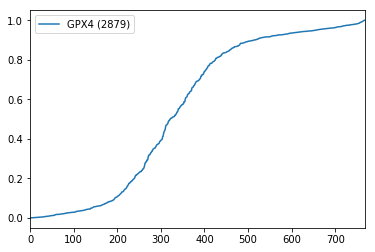

In [109]:
gpx = dep["GPX4 (2879)"].sort_values()
gpx = gpx.reset_index()
gpx = gpx.drop('index',1)
gpx.plot()

In [6]:
# the matrix
correlations = dep.corr()

In [4]:
sci.stats.pearsonr(dep['A2M (2)'][1:4],dep['A2M (2)'][1:4])

(1.0, 0.0)

In [7]:
#sci.stats.pearsonr(dep.columns.values,dep.columns.values)

In [38]:
#correlations[["A2M (2)"]].sort_values(by=['A2M (2)'])

## Test Data fuer die Korrelation

In [4]:
df = pd.DataFrame(np.random.random((6, 6)), columns=['gene_' + chr(i + ord('a')) for i in range(6)]) 
print(df)

     gene_a    gene_b    gene_c    gene_d    gene_e    gene_f
0  0.735955  0.400680  0.246593  0.913273  0.747246  0.791465
1  0.547346  0.072919  0.933062  0.232660  0.377221  0.343400
2  0.654725  0.641919  0.297961  0.912088  0.441782  0.587996
3  0.896772  0.286375  0.721536  0.371457  0.258281  0.909784
4  0.756991  0.024119  0.475772  0.969679  0.989577  0.244825
5  0.597021  0.679071  0.642593  0.648500  0.951326  0.211457


In [28]:
query = df.query('gene_a > gene_b').iloc[::,0:2]
query.index.to_list()

[0, 2, 5]

In [6]:
def get_conditions(df):
    # return row in which ga pairwise_correlation is higher than the average 
    result = df[(df.gene_a < df.gene_b) & (df.gene_a < df.gene_c) & (df.gene_a < df.gene_d)]
    return result.index.to_list()
    

In [7]:
get_conditions(df)

[5]

In [49]:
new = ['avana',"plana",0,'quana',1,'tana']
df = df.reindex(new, fill_value=0)

,level_0,index,gene_a,gene_b,gene_c,gene_d,gene_e,gene_f
avana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
plana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0,0,0.735955,0.400680,0.246593,0.913273,0.747246,0.791465
quana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,0.547346,0.072919,0.933062,0.232660,0.377221,0.343400
tana,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
df = df.T
df.rename(columns={0:'atg',1:'pln'})

,atg,pln,2,3,4,5
level_0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
gene_a,0.735955,0.547346,0.654725,0.896772,0.756991,0.597021
gene_b,0.400680,0.072919,0.641919,0.286375,0.024119,0.679071
gene_c,0.246593,0.933062,0.297961,0.721536,0.475772,0.642593
gene_d,0.913273,0.232660,0.912088,0.371457,0.969679,0.648500
gene_e,0.747246,0.377221,0.441782,0.258281,0.989577,0.951326
gene_f,0.791465,0.343400,0.587996,0.909784,0.244825,0.211457


In [8]:
df

,gene_a,gene_b,gene_c,gene_d,gene_e,gene_f
0,0.735955,0.400680,0.246593,0.913273,0.747246,0.791465
1,0.547346,0.072919,0.933062,0.232660,0.377221,0.343400
2,0.654725,0.641919,0.297961,0.912088,0.441782,0.587996
3,0.896772,0.286375,0.721536,0.371457,0.258281,0.909784
4,0.756991,0.024119,0.475772,0.969679,0.989577,0.244825
5,0.597021,0.679071,0.642593,0.648500,0.951326,0.211457


In [34]:
df[(df.gene_a > 0.6) &  (df.gene_a < 0.8)]

,gene_a,gene_b,gene_c,gene_d,gene_e,gene_f
0,0.735955,0.400680,0.246593,0.913273,0.747246,0.791465
2,0.654725,0.641919,0.297961,0.912088,0.441782,0.587996
4,0.756991,0.024119,0.475772,0.969679,0.989577,0.244825


check out biclustering.

find a way to return indices of relevant genes


In [59]:
data = pd.read_csv("/home/annerer/Downloads/sample_info.csv")
data['RAN']

,DepMap_ID,stripped_cell_line_name,CCLE_Name,Alias,COSMICID,sex,source,Achilles_n_replicates,cell_line_NNMD,culture_type,...,primary_or_metastasis,primary_disease,Subtype,age,Sanger_Model_ID,depmap_public_comments,lineage,lineage_subtype,lineage_sub_subtype,lineage_molecular_subtype
0,ACH-000001,NIHOVCAR3,NIHOVCAR3_OVARY,OVCAR3,905933.0,Female,ATCC,NaN,NaN,NaN,...,Metastasis,Ovarian Cancer,"Adenocarcinoma, high grade serous",60.0,SIDM00105,NaN,ovary,ovary_adenocarcinoma,high_grade_serous,NaN
1,ACH-000002,HL60,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,905938.0,Female,ATCC,NaN,NaN,NaN,...,Primary,Leukemia,"Acute Myelogenous Leukemia (AML), M3 (Promyelo...",35.0,SIDM00829,NaN,blood,AML,M3,NaN
2,ACH-000003,CACO2,CACO2_LARGE_INTESTINE,"CACO2, CaCo-2",NaN,Male,ATCC,NaN,NaN,NaN,...,NaN,Colon/Colorectal Cancer,Adenocarcinoma,NaN,SIDM00891,NaN,colorectal,colorectal_adenocarcinoma,NaN,NaN
3,ACH-000004,HEL,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,907053.0,Male,DSMZ,2.0,-3.079202,Suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00594,NaN,blood,AML,M6,NaN
4,ACH-000005,HEL9217,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Male,ATCC,2.0,-2.404409,Mixed adherent and suspension,...,NaN,Leukemia,"Acute Myelogenous Leukemia (AML), M6 (Erythrol...",30.0,SIDM00593,NaN,blood,AML,M6,NaN


## Umbenennen der Zelllinien. 

siehe querrying depmap

In [120]:
mapping = {}

for i in np.arange(0,data.shape[0],1):
    mapping[data.DepMap_ID[i]] = data.CCLE_Name[i]

#mappign = data[['CCLE_Name','DepMap_ID']].to_dict()

In [121]:
dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

In [123]:
dep["new_index"] = dep.DepMap_ID
dep = dep.set_index('new_index')

In [124]:
dep = dep.rename(index=mapping)

password for phosphosite:

EfBGWYFFN8UtbAi

In [58]:
#df = pd.DataFrame(np.random.randn(10, 2), columns=list('ab'))
#df.query('a > b')

In [41]:
df = pd.DataFrame(np.random.random((6, 6)), columns=['gene_' + chr(i + ord('a')) for i in range(6)]) 
print(df)
df['gene_a'][3] = np.nan
df['gene_d'][4] = np.nan
df['gene_c'][2] = np.nan
df['gene_f'][1] = np.nan

     gene_a    gene_b    gene_c    gene_d    gene_e    gene_f
0  0.665301  0.869902  0.879890  0.169911  0.608579  0.341876
1  0.277930  0.497177  0.199557  0.956748  0.328038  0.248854
2  0.438563  0.367788  0.437718  0.481967  0.745440  0.861007
3  0.878028  0.214308  0.532944  0.560893  0.383670  0.271503
4  0.725735  0.719277  0.773572  0.248921  0.191922  0.422448
5  0.032156  0.146041  0.829202  0.918093  0.877938  0.340987


In [59]:
# !!!
correlations = {}

for col_a, col_b in itertools.combinations(df, 2):
    nas = np.logical_or(np.isnan(df[col_a]), np.isnan(df[col_b]))
    corr = pearsonr(df[col_a][~nas], df[col_b][~nas])
    correlations[col_a + '__' + col_b] = corr
# !!!

In [61]:
result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

In [50]:
correlations = {}
columns = df.columns.tolist()

In [56]:
sorted_pcc = result.sort_values(by=["PCC"])

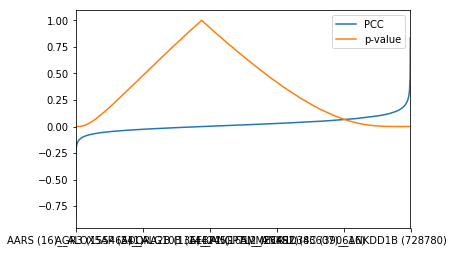

In [66]:
sorted_pcc.plot()

## Pairwise Gene Correlations DepMap 20Q2

In [47]:
cols = data.columns.tolist()

In [ ]:
result.sort_values(by=['PCC'])

In [14]:
# berechnung dauert lang, unbedingt als csv exportieren
result.to_csv('pairwise-gene-correlations-DepMap-20Q2.csv')

todo:
for the gene interaction pairs
pair-correlation-scoreverteilung binnen und plotten. Unerwartete Bimodalitaet bzw tails?

dependency-matrix clustern. ?

wir nehmen die besten 15% der scores und 
nehmen die relevanten matrixteile als unsere
neue ausgangsmatrix.
diese sollte man nun durchsuchen koennen,
naemlich nach Gen-paaren. 
dh die matrix besteht aus conditions, die
unser output sind, und signifikanten gen-paaren.
conditions bleiben alle, wir beschneiden die
gene die wir drinlassen. 
frage: wie sehen wir die? wir haben die werte
ja von den gen-paaren, und jetzt eine matrix 
von genen und conditions.

   c c c c c c c c c 

g  1 0 0 0 0 0 0 0 0 

g  1 0 0 0 0 0 0 0 0


macht das sinn?
todo also:
how to efficiently rename colum names, for conditions.
if you can do that, i am still not sure if the same lines will mean anything. see if it works with the depmap and the avana data.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
import itertools
from scipy.stats import pearsonr

dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

data = dep
data = data.replace(-np.inf, np.nan)
data = data.replace(np.inf,np.nan)
data = data.fillna(0)
corrs = {}
cols = data.columns.tolist()

for col_a, col_b in itertools.combinations(cols, 2):
    nas = np.logical_or(np.isnan(col_a), np.isnan(col_b))
    corr = pearsonr(x[~nas], y[~nas])
    corrs[col_a + '_' + col_b] = pearsonr(data.loc[:, col_a], data.loc[:, col_b])   
    
    
result = pd.DataFrame.from_dict(corrs, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())
# berechnung dauert lang, unbedingt als csv exportieren
result.to_csv('pairwise-gene-correlations-DepMap-20Q2.csv')

### 11.5 GB output file of Correlated Gene-Dependency (Probability of Depletion Effect) pairs. Calculated on Sauron Cluster of KFU.

In [28]:
corrs = pd.read_csv("/home/annerer/Dokumente/pairwise.csv")
corrs = corrs.rename(columns={'Unnamed: 0': 'pair','PCC':'PCC','p-value':'pvalue'})

In [31]:
(by="PCC")

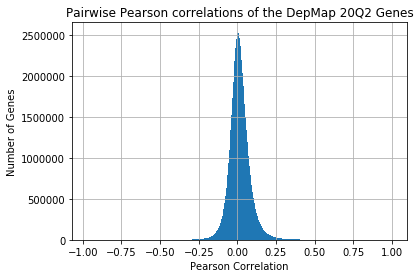

In [35]:
sorted_corrs['PCC'].hist(bins=1000)
plt.title("Pairwise Pearson correlations of the DepMap 20Q2 Genes")
plt.xlabel("Pearson Correlation")
plt.ylabel("Number of Genes")
plt.savefig('pcc_histogram')

In [9]:
#sorted_corrs.plot()

In [ ]:
sorted_corrs.tail(20)

In [133]:
#top_ten_percent = np.int(np.round(0.1*np.shape(sorted_corrs)[0]))

#sorted_corrs[['PCC']].nlargest(top_ten_percent)

In [28]:
top_ten_percent = np.int(np.round(0.1*np.shape(sorted_corrs)[0]))

16414002

In [22]:
np.shape(sorted_corrs)

(164140021, 3)

In [5]:
#sorted_corrs[(sorted_corrs.pvalue > 0.7) & (sorted_corrs.p-value < 0.8)]

In [14]:
pearsonr(dep['RFX8 (731220)'].fillna(0),dep["TBC1D8 (11138)"].fillna(0))

(0.27689410232627454, 5.307131873700017e-15)

In [15]:
pearsonr(dep['RFX8 (731220)'],dep["TBC1D8 (11138)"])

(0.27689410232627454, 5.307131873700017e-15)

In [16]:
pearsonr(dep['RFX8 (731220)'],dep["TGOLN2 (10618)"])

(0.16009665331919112, 8.150190010166789e-06)

In [7]:
corrs = corrs.rename(columns={'Unnamed: 0': 'pair','PCC':'PCC','p-value':'pvalue'})

In [18]:
corrs[corrs.pair.str.match('A2M')]

,pair,PCC,pvalue
164139955,ZUP1 (221302)__ZW10 (9183),-0.003519,0.922391
164139956,ZUP1 (221302)__ZWILCH (55055),-0.026879,0.456697
164139957,ZUP1 (221302)__ZWINT (11130),-0.145157,0.000053
164139958,ZUP1 (221302)__ZXDA (7789),0.105321,0.003455
164139959,ZUP1 (221302)__ZXDB (158586),0.068480,0.057676
164139960,ZUP1 (221302)__ZXDC (79364),-0.005075,0.888257
164139961,ZUP1 (221302)__ZYG11A (440590),0.081155,0.024414
164139962,ZUP1 (221302)__ZYG11B (79699),0.027867,0.440304
164139963,ZUP1 (221302)__ZYX (7791),0.089964,0.012568
164139964,ZUP1 (221302)__ZZEF1 (23140),0.030798,0.393729


In [55]:
#pearsonr(dep['RFXAP (5994)'].fillna(0),dep["ZUP1 (221302)"].fillna(0))

In [50]:
gene = dep.columns.to_list()
#gene

In [51]:
gene.pop(0)
#gene

'DepMap_ID'

In [31]:
# split at space
for i in range(len(gene)):
    gene[i] = gene[i].split(" ")
    

In [38]:
#gene
genes = []

for i in range(len(gene)):
    genes.append(gene[i][0])

In [40]:
len(genes)
'C8orf33' in genes

18119

In [41]:
data = pd.read_csv('/home/annerer/Downloads/elife-58925-supp2-v3.txt')

In [45]:
data = data["DMKN"].to_list()

In [7]:
# using sets to compare the lists
'''
list1 = genes
list2 = data
intersection_set = set.intersection(set(list1), set(list2))
# find intersection of list1 and list2
intersection_list = list(intersection_set)
print(intersection_list)
'''

'\n\nlist1 = genes\n\nlist2 = data\n\nintersection_set = set.intersection(set(list1), set(list2))\n\n# find intersection of list1 and list2\n\nintersection_list = list(intersection_set)\n\nprint(intersection_list)\nprint(len(intersection_list))\nprint(len(data))\n'

# Querrying the Co-Dependencies for the Cell Lines they occur in

fuer eine etwaige suche wuerde ich in Pandas die Indexe, die ich 
in Zelllinien-Namen umbenannt habe ausgebe fuer Paare in denen die Co-Dependency hoch ist. 
Dh ich habe eine Matrix. Gegeben ein Wert in einer Spalte ist hoch - gib den Index (die Zelllinie) aus. Wenn ein Wert in einer Spalte einer Co-Dependency entspricht sollte es so funktionieren.

## If this is done, the results could be checked against the genome to find if it is an oncogene addiction or not.

which files do we need for the genomes?
how do we best display them?
